In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import sys
from sklearn.neighbors import DistanceMetric

In [15]:
def createDataMatrix(images):
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, sz[0]*sz[1]), dtype=np.float32)
    for i in range(0, numImages):
        image = images[i].flatten()
        data[i,:] = image
    return data
def identification(image,images):
    distance=[None]*len(images)
    min=sys.maxsize
    for i in range (len(images)):
        sd=np.linalg.norm(image-images[i])
        distance[i] = sd
    A,B,C,D,E,F,G,H,I,J,K,L,M, *_ = np.partition(distance, 1)
    print(findA(A,distance))
    print(findA(B,distance))                
def findA(A,distance):
    for i in range(len(images)):
        if(A==distance[i]):
            return i

Describe how you selected the images with respect to the conditions of the detection/classification methods

For pca method, we need to find faces that are relatively have the same position, which means having eyes, nose and mouth relatively at the same position in each training picture.

[[-0.00595685 -0.00576222 -0.00585812 ... -0.00356932 -0.00387911
  -0.00338141]
 [ 0.00204808  0.00232653  0.00236788 ...  0.00485002  0.00485444
   0.00520581]
 [ 0.00393302  0.00450425  0.00498684 ... -0.00712563 -0.00676126
  -0.00827027]
 ...
 [-0.00262998 -0.00258788 -0.00243452 ...  0.00116416  0.00204073
   0.00131093]
 [ 0.00121431  0.00139098  0.00112439 ... -0.00621572 -0.00534952
  -0.00471469]
 [-0.06667653  0.06863289  0.3618566  ... -0.00164752  0.00285376
   0.00268474]]


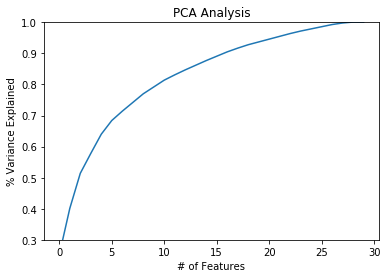

In [16]:
# import images
img_pathT1 = "Taylor Swift1.jpg"
img_pathT2 = "Taylor Swift2.jpg"
img_pathT3 = "Taylor Swift3.jpg"
img_pathT4 = "Taylor Swift4.jpg"
img_pathT5 = "Taylor Swift5.jpg"
img_pathT6 = "Taylor Swift6.jpg"
img_pathT7 = "Taylor Swift7.jpg"
img_pathT8 = "Taylor Swift8.jpg"
img_pathT9 = "Taylor Swift9.jpg"
img_pathT10 = "Taylor Swift10.jpg"
imageT1 = cv2.imread(img_pathT1)
imageT2 = cv2.imread(img_pathT2)
imageT3 = cv2.imread(img_pathT3)
imageT4 = cv2.imread(img_pathT4)
imageT5 = cv2.imread(img_pathT5)
imageT6 = cv2.imread(img_pathT6)
imageT7 = cv2.imread(img_pathT7)
imageT8 = cv2.imread(img_pathT8)
imageT9 = cv2.imread(img_pathT9)
imageT10 = cv2.imread(img_pathT10)
img_pathca1 = "cabello1.jpg"
img_pathca2 = "cabello2.jpg"
img_pathca3 = "cabello3.jpg"
img_pathca4 = "cabello4.jpg"
img_pathca5 = "cabello5.jpg"
img_pathca6 = "cabello6.jpg"
img_pathca7 = "cabello7.jpg"
img_pathca8 = "cabello8.jpg"
img_pathca9 = "cabello9.jpg"
img_pathca10 = "cabello10.jpg"
imageca1 = cv2.imread(img_pathca1)
imageca2 = cv2.imread(img_pathca2)
imageca3 = cv2.imread(img_pathca3)
imageca4 = cv2.imread(img_pathca4)
imageca5 = cv2.imread(img_pathca5)
imageca6 = cv2.imread(img_pathca6)
imageca7 = cv2.imread(img_pathca7)
imageca8 = cv2.imread(img_pathca8)
imageca9 = cv2.imread(img_pathca9)
imageca10 = cv2.imread(img_pathca10)
img_pathch1 = "Charli XCX1.jpg"
img_pathch2 = "Charli XCX2.jpg"
img_pathch3 = "Charli XCX3.jpg"
img_pathch4 = "Charli XCX4.jpg"
img_pathch5 = "Charli XCX5.jpg"
img_pathch6 = "Charli XCX6.jpg"
img_pathch7 = "Charli XCX7.jpg"
img_pathch8 = "Charli XCX8.jpg"
img_pathch9 = "Charli XCX9.jpg"
img_pathch10 = "Charli XCX10.jpg"
imagech1 = cv2.imread(img_pathch1)
imagech2 = cv2.imread(img_pathch2)
imagech3 = cv2.imread(img_pathch3)
imagech4 = cv2.imread(img_pathch4)
imagech5 = cv2.imread(img_pathch5)
imagech6 = cv2.imread(img_pathch6)
imagech7 = cv2.imread(img_pathch7)
imagech8 = cv2.imread(img_pathch8)
imagech9 = cv2.imread(img_pathch9)
imagech10 = cv2.imread(img_pathch10)
images = [imageT1,imageT2,imageT3,imageT4,imageT5,imageT6,imageT7,imageT8,imageT9,imageT10,
         imageca1,imageca2,imageca3,imageca4,imageca5,imageca6,imageca7,imageca8,imageca9,imageca10,
          imagech1,imagech2,imagech3,imagech4,imagech5,imagech6,imagech7,imagech8,imagech9,imagech10]
# convert images into 128 size and grayscale
for i in range (len(images)):
    images[i]=cv2.resize(images[i],(250,250))
    images[i]=cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
#generate the data matrix as N
data = createDataMatrix(images)
# use pca to train the data and fine the eigenvector and [
covar_matrix = PCA(n_components = 30)
covar_matrix.fit(data)
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3))
#images_centered = images - np.mean(images, axis=0)
#cov_matrix=np.dot(images_centered.T, images_centered) / n_samples
#print eigenvectors
print(covar_matrix.components_)

#plt the result
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0.30,1)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

Discuss Do you need all the vectors to represent the data?

No, we don't need all the vectors to represent the data. As we can see from the plot, the variance Explained saturates at some level, that's where there is no more features can be added into the training set. In my case, it is around 25.

In [17]:
index = [None]*30
distance = [None]*30
i=0
j=0
#calculate the distance between each point to each point and fine the shortest distance
while i < len(data):
    j = 0
    min = sys.maxsize
    if(i==0):
        j=1
    while j < len(data): 
        sd=np.linalg.norm(data[i]-data[j])
        if(sd<min):
            min=sd
            distance[i]=sd
            index[i] = j
        if(j==i-1):
            j=j+2
        j=j+1
    i=i+1
print(index)
print(distance)
# calcualte the success rate
succ=0
for i in range(30):
    if((index[i]//10)-(i//10)==0):
        succ=succ + 1./30.  
print("Success rate:")
print(succ)


[18, 6, 1, 5, 7, 3, 5, 9, 0, 0, 18, 18, 14, 2, 13, 17, 19, 19, 0, 18, 17, 5, 24, 22, 22, 9, 2, 22, 9, 5]
[11307.634, 13024.271, 13548.792, 13055.997, 15623.219, 13055.997, 12769.621, 13166.444, 13226.674, 13087.305, 13687.881, 14051.6045, 13970.114, 15825.155, 13587.989, 16269.442, 12934.591, 14963.869, 11307.634, 12655.613, 17249.166, 18119.18, 10876.163, 14604.749, 10876.163, 14966.214, 18217.484, 14190.052, 17161.514, 15422.958]
Success rate:
0.7


In [18]:
#reconstruction of using eigenvectors
distance_ei = [None]*30
index_ei = [None]*30
constructed = [None]*30
coef=[None]*30
time = [None]*30
i=0
j=0
for i in range (len(data)):
    constructed[i]=covar_matrix.mean_
    coef[i]=covar_matrix.mean_
    for j in range (len(data)):
        coef[i] = coef[i]+np.dot((data[i]-covar_matrix.mean_),covar_matrix.components_[j])
        constructed[i] = constructed[i]+np.dot((data[i]-covar_matrix.mean_),covar_matrix.components_[j])*covar_matrix.components_[j]  

index = [None]*30
distance = [None]*30
i=0
j=0
while i < len(covar_matrix.components_):
    j = 0
    min = sys.maxsize
    if(i==0):
        j=1
    while j < len(covar_matrix.components_): 
        sd=np.linalg.norm(constructed[i]-constructed[j])
        if(sd<min):
            min=sd
            distance_ei[i]=sd
            index_ei[i] = j
        if(j==i-1):
            j=j+2
        j=j+1
    i=i+1
succ=0
for i in range(30):
    if((index_ei[i]//10)-(i//10)==0):
        succ=succ + 1./30.  
print(index_ei)
print(distance_ei)
print("Success rate:")
print(succ)

[18, 6, 1, 5, 7, 3, 5, 9, 0, 0, 18, 18, 14, 2, 13, 17, 19, 19, 0, 18, 17, 5, 24, 22, 22, 9, 2, 22, 9, 5]
[11307.637, 13024.271, 13548.798, 13055.997, 15623.219, 13055.997, 12769.619, 13166.443, 13226.665, 13087.307, 13687.885, 14051.604, 13970.114, 15825.157, 13587.998, 16269.441, 12934.589, 14963.869, 11307.637, 12655.614, 17249.166, 18119.18, 10876.166, 14604.745, 10876.166, 14966.217, 18217.486, 14190.054, 17161.516, 15422.956]
Success rate:
0.7


How well-clustered is your data? Do this both in the original pixel
space and the eigenspace, then compare the values; would you expect there to
be a significant difference?

The accuracy of my data seems all right. I have 70% accurate rate for both the pixel and eigenspace representations. There is no significant difference of my pixel and eigenspace representations. 

the first face matches training pic
0
18
the second face matches training pic
0
22
the third face matches training pic
18
0


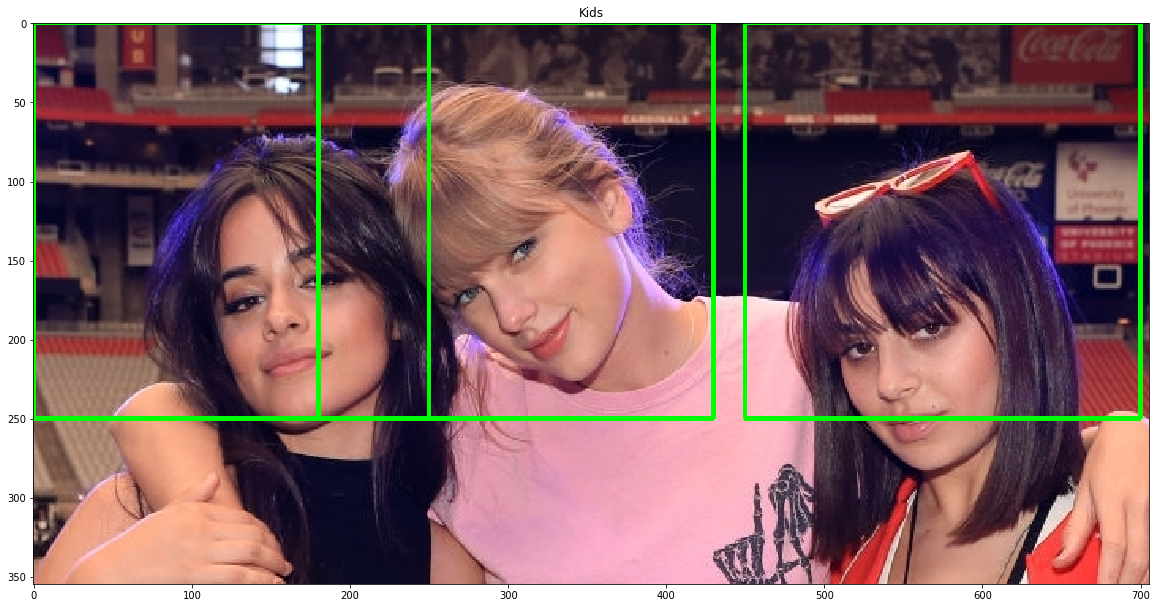

In [19]:
# load image
img_path = "3people.jpg"
img = cv2.imread(img_path)
# have something to display
disp = img.copy()
disp = cv2.cvtColor(disp,cv2.COLOR_BGR2RGB)
# get the grayscale picture
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dist = DistanceMetric.get_metric('euclidean')

# setup for the window
step   = 90
windows=[]
index=[]
ht, wt = images[0].shape

location=[]
face =[]
# partition the input picture
for y in range(0, img.shape[0]-ht, step):
    for x in range(0, img.shape[1]-wt, step):        
        snap = img[y:y + ht, x:x + wt]
        flat = snap.flatten()
        windows.append(flat)
        location.append([y,x])
# use pca to test 
for i in range(len(windows)):
    inPut = np.vstack((windows[i],data))
    covar_matrix.fit(inPut)
    eigenspace = covar_matrix.transform(inPut)
    distance = dist.pairwise(inPut)
    distance[0][0]=distance.max()
    eucdist=distance.min (axis=1)
    check=distance[0].argmin()
    # get area which has a distance under threshold
    if(eucdist[0]<15000): 
        index.append(i)
        face.append(windows[i])
        
# doing identification
for i in range(len(face)):
    if(i==0):
        print("the first face matches training pic")
    if(i==1):
        print("the second face matches training pic")
    if(i==2):
        print("the third face matches training pic")
    identification(face[i],data)
    
# draw rectangle
for i in range(len(index)):
    y,x = location[index[i]]
    cv2.rectangle(disp, (x, y), (x+wt, y+ht), (0, 255, 0), 2)
# show image
plt.figure(figsize=(20, 20))
plt.imshow(disp), plt.title('Kids')
plt.show()                  

Q: How well does the method work? How many false positive face detections do you get? For
mis-identified faces, report the number of neighbours you need before getting
the correct label (correct identification would use 1). In which situations would
expect the approach to fail, and what could you do to improve it

A: My code works somewhat well. It seems like i have no false positives. But if we do the identification, we can see that for the left face, i need to find two neighbors to find her face, and for the right face i cannot find the match even i tried 10 neighbors, and for the one in the middle, i only need to find the firse neighbor. If we add more training data to our training images, we should get a better result. If the noise of the background is too close to the eigenspace, we might fail. Also, if the picture does not have a good linear conbination, the result might not be good. 

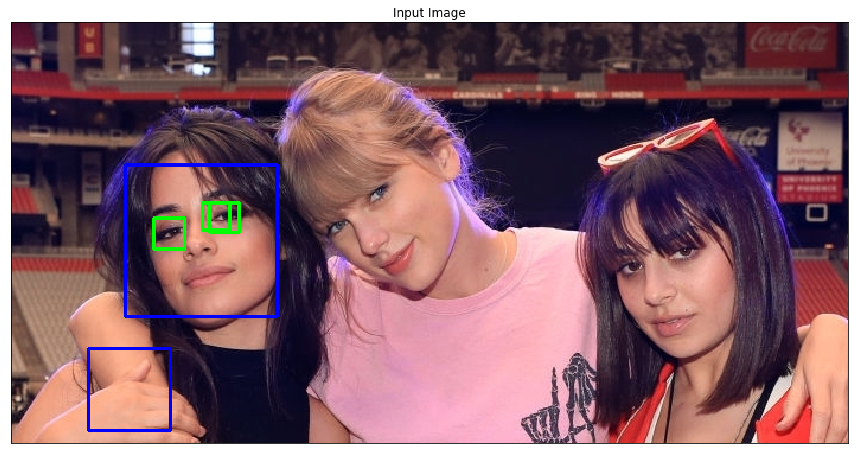

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Get OpenCV datapath
data_path = cv2.data.haarcascades
face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_eye.xml'))

img_path = "3people.jpg"
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces
# detectMultiScape(image, scaleFactor, minNeighbors)
# scaleFactor - parameter specifying how much the image size is reduced
#  at each image scale
# minNeighbors - parameter specifying how many neighbors each candidate
#  rectangle should have to retain
faces = face_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.show()

Use an existing implementation of the Viola-Jones face detector, and compare
the results with your detector (e.g. how many false positives do you obtain?).
Under what conditions would you expect the Viola-Jones detector to work when
PCA does not? (5 points).

If using Viola-Jones face detector, i have 1 false positive. If the training set is small, the Viola-Jones would give better result. PCA looks for linear conbinations, if the picture is not in linear conbinations, the result may not as good as Viola-Jones.